#### 17.04.2023 - https://arxiv.org/pdf/2009.08366.pdf

In [17]:
import pandas as pd

In [18]:
from transformers import AutoModel, AutoTokenizer

model_name = "microsoft/graphcodebert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

Some weights of the model checkpoint at microsoft/graphcodebert-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to

In [43]:
from tqdm.notebook import trange

def get_vector(text):
    return model(**(tokenizer(text, return_tensors='pt')))

def get_vectors_for_batch(texts):
    with torch.no_grad():
        return model(**(tokenizer(list(texts), return_tensors='pt', padding=True, truncation=True, max_length=512)))['pooler_output']

def get_vectors_for_texts(texts, batch_size):
    steps = len(texts) // batch_size
    if len(texts) % batch_size == 0:
        steps -= 1
    res = []
    for step in trange(steps):
        batch = texts[batch_size * step : batch_size * (step + 1)]
        res += get_vectors_for_batch(batch)
    return res

In [20]:
get_vector("allo")

tokenizer("allo")

{'input_ids': [0, 24061, 2], 'attention_mask': [1, 1, 1]}

In [21]:
tokenizer.tokenize("allo", add_special_tokens=True)

['<s>', 'allo', '</s>']

In [23]:
from datasets import load_dataset

dataset = load_dataset("PoolC/1-fold-clone-detection-600k-5fold")

Found cached dataset parquet (C:/Users/79138/.cache/huggingface/datasets/PoolC___parquet/snoop2head--1-fold-clone-detection-600k-5fold-57d7a53828ee0494/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
train = dataset['train']

In [ ]:
i_will_use_data_train = pd.DataFrame(train[:10000])

In [ ]:
del dataset, train

In [ ]:
i_will_use_data_train.to_csv("data/train.csv")

In [ ]:
import torch

cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

In [44]:
vectors = get_vectors_for_texts(i_will_use_data_train.code1.values, 1)

  0%|          | 0/9999 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [16]:
i = 4
vector1 = get_vector(i_will_use_data_train.iloc[i]['code1'])
vector2 = get_vector(i_will_use_data_train.iloc[i+147]['code2'])

output = cos(vector1, vector2)
output

TypeError: cosine_similarity(): argument 'x1' (position 1) must be Tensor, not BaseModelOutputWithPoolingAndCrossAttentions

In [19]:
i_will_use_data_train

,code1,code2,similar,pair_id,question_pair_id,code1_group,code2_group
0,"n, m, l = map(int, input().split())\na = [list...","def main():\n\n N, D = map(int, input().spl...",0,NaN,3.686762e+12,60,96
1,import math\nalpha = []\nwhile True:\n n = ...,import math\n\n\ndef main():\n while True:\...,1,1.867224e+11,NaN,31,31
2,H = int(input())\n\ndef attack(h):\n if h =...,h = int(input())\n\nans = 0\nn_enemy = 1\nwhil...,1,7.988436e+13,NaN,228,228
3,"def lcm(a, b):\n from fractions import gcd\...","suits = ['S', 'H', 'C', 'D']\ntable = [[False]...",0,NaN,4.416509e+13,235,54
4,"a1, a2, a3 = map(int, input().split("" ""))\ntmp...",#!/usr/bin/env python3\n\nimport sys\nimport m...,1,1.188024e+14,NaN,260,260
...,...,...,...,...,...,...,...
99995,S = input()\nT = input()\nans = len(T)\nfor i ...,import bisect\nimport itertools\nimport numpy ...,0,NaN,5.589089e+13,82,252
99996,import itertools\n\nN = int(input())\nP = tupl...,n=str(input())\na=list(n)\nb=0\nfor i in a:\n ...,0,NaN,5.251741e+13,246,87
99997,n=int(input())\ns=[str(input()) for _ in range...,"A,B,C = map(int,input().split())\nif C > B and...",0,NaN,3.495554e+13,218,39
99998,"A, B = map(float, input().split())\n\nA = int(...","while True:\n (m, f, r) = input().rstrip('\r\...",0,NaN,8.867122e+12,135,57


In [24]:
train = pd.read_csv("data/evaluated.csv")

In [26]:
train

,Unnamed: 0.1,Unnamed: 0,code1,code2,similar,pair_id,question_pair_id,code1_group,code2_group,simi
0,0,0,"n, m, l = map(int, input().split())\na = [list...","def main():\n\n N, D = map(int, input().spl...",0,NaN,3.686762e+12,60,96,0.882105
1,1,1,import math\nalpha = []\nwhile True:\n n = ...,import math\n\n\ndef main():\n while True:\...,1,1.867224e+11,NaN,31,31,0.889674
2,2,2,H = int(input())\n\ndef attack(h):\n if h =...,h = int(input())\n\nans = 0\nn_enemy = 1\nwhil...,1,7.988436e+13,NaN,228,228,0.857718
3,3,3,"def lcm(a, b):\n from fractions import gcd\...","suits = ['S', 'H', 'C', 'D']\ntable = [[False]...",0,NaN,4.416509e+13,235,54,0.888247
4,4,4,"a1, a2, a3 = map(int, input().split("" ""))\ntmp...",#!/usr/bin/env python3\n\nimport sys\nimport m...,1,1.188024e+14,NaN,260,260,0.849339
...,...,...,...,...,...,...,...,...,...,...
9979,9979,9979,str_num = input()\nnum_list = str_num.split()\...,"if __name__ == ""__main__"":\n a,b = map(int, i...",1,1.592214e+13,NaN,133,133,0.840594
9980,9980,9980,import math\nalpha = []\nwhile True:\n n = ...,import math\nwhile True:\n n=int(input())\n...,1,1.933779e+11,NaN,31,31,0.952995
9981,9981,9981,"N, K, C = map(int, input().split())\nS = input...","n, k, c = map(int, input().split())\nS = input...",1,4.070239e+13,NaN,182,182,0.910506
9982,9982,9982,S = input()\n\nif S[len(S) - 1] == 's':\n p...,S=str(input())\nif S[-1]=='s':\n S = S + 'e...,1,2.391197e+12,NaN,71,71,0.945273


In [27]:
no = train[train.similar == 0].reset_index(drop=True)
yes = train[train.similar == 1].reset_index(drop=True)

In [41]:
thresholds = []
precisions = []
recalls = []
f1s = []

for i in range(0, 100):
    t = i / 100
    fn = len(yes[yes.simi < t])
    tp = len(yes[yes.simi >= t])
    fp = len(no[no.simi >= t])

    pre = 0 if tp == 0 else tp / (tp + fp) 
    rec = 0 if tp == 0 else tp / (fn + tp)
    f1 = 0 if tp == 0 else 2 * pre * rec / (pre + rec)

    thresholds.append(t)
    precisions.append(pre)
    recalls.append(rec)
    f1s.append(f1)

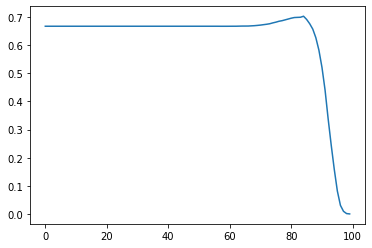

In [42]:
import matplotlib.pyplot as plt

plt.plot(f1s)

In [45]:
from datasets import load_dataset

dataset = load_dataset("code_x_glue_cc_clone_detection_big_clone_bench")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/901028 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/415416 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/415416 [00:00<?, ? examples/s]

Dataset code_x_glue_cc_clone_detection_big_clone_bench downloaded and prepared to C:/Users/79138/.cache/huggingface/datasets/code_x_glue_cc_clone_detection_big_clone_bench/default/0.0.0/4c85673dc4ced396531cf81e6c10e61f23eca84ca840ca137f52a15dd19c8789. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [51]:
pd.DataFrame(dataset['train'][:10000]).to_csv("data/java_train.csv")

In [52]:
java_train = pd.read_csv("data/java_train.csv")

In [60]:
java_train[:1000].label.value_counts()

True     505
False    495
Name: label, dtype: int64

In [61]:
ss_vectors = get_vectors_for_texts(java_train.func1[:1000].values, 1) 

  0%|          | 0/999 [00:00<?, ?it/s]

In [62]:
ss_vectors2 = get_vectors_for_texts(java_train.func2[:1000].values, 1) 

  0%|          | 0/999 [00:00<?, ?it/s]

In [64]:
sims = cos(torch.stack(ss_vectors), torch.stack(ss_vectors2))

In [69]:
java_train = java_train[:999]

In [70]:
java_train["simi"] = sims.numpy()

C:\Users\79138\AppData\Local\Temp\ipykernel_17156\2777314523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  java_train["simi"] = sims.numpy()


In [72]:
no = java_train[~java_train.label]
yes = java_train[java_train.label]

In [73]:
thresholds = []
precisions = []
recalls = []
f1s = []

for i in range(0, 100):
    t = i / 100
    fn = len(yes[yes.simi < t])
    tp = len(yes[yes.simi >= t])
    fp = len(no[no.simi >= t])

    pre = 0 if tp == 0 else tp / (tp + fp) 
    rec = 0 if tp == 0 else tp / (fn + tp)
    f1 = 0 if tp == 0 else 2 * pre * rec / (pre + rec)

    thresholds.append(t)
    precisions.append(pre)
    recalls.append(rec)
    f1s.append(f1)

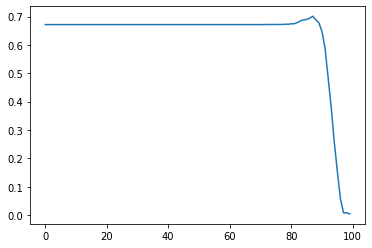

In [74]:
import matplotlib.pyplot as plt

plt.plot(f1s)

In [95]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

Roc-AUC: 0.7406401571331223


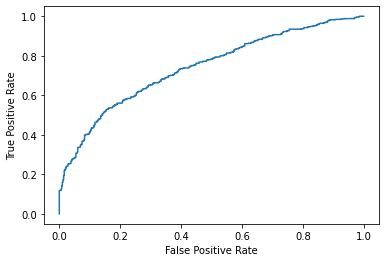

In [99]:
fpr, tpr, _ = roc_curve(java_train.label, java_train.simi)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(f"Roc-AUC: {roc_auc_score(java_train.label, java_train.simi)}")

In [ ]:
thresholds = []
precisions = []
recalls = []
f1s = []

for i in range(0, 100):
    t = i / 100
    fn = len(yes[yes.simi < t])
    tp = len(yes[yes.simi >= t])
    fp = len(no[no.simi >= t])

    pre = 0 if tp == 0 else tp / (tp + fp) 
    rec = 0 if tp == 0 else tp / (fn + tp)
    f1 = 0 if tp == 0 else 2 * pre * rec / (pre + rec)

    thresholds.append(t)
    precisions.append(pre)
    recalls.append(rec)
    f1s.append(f1)

In [100]:
f1s

[0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531914894,
 0.6715425531

In [140]:
from tree_sitter import Language, Parser, Tree, TreeCursor, Node
from IPython.display import clear_output, display, Markdown
import pandas as pd
import numpy as np
import time

In [18]:
data = pd.read_csv("java_test.csv")
data.head(3)

,Unnamed: 0,id,id1,id2,func1,func2,label
0,0,108,8452567,13688266,private static JSONObject sendCouchRequest...,@Override\n public boolean checkLink(St...,False
1,1,39,23530036,14196271,public void save(boolean saveAs) {\n ...,private synchronized File zipTempFile(File...,False
2,2,42,323592,9327648,public void elimina(Pedido pe) throws erro...,public File getPreprocessedTextFile(File o...,False


In [341]:
i = 3
func = data.func1.iloc[i]
Markdown(f"""```java
{func}
```""")

```java
    public String encrypt(final char[] password, final String algorithm, final byte[] salt) {
        final StringBuffer buffer = new StringBuffer();
        MessageDigest digest = null;
        int size = 0;
        if ("SHA".equalsIgnoreCase(algorithm) || "SSHA".equalsIgnoreCase(algorithm)) {
            size = 20;
            if ((salt != null) && (salt.length > 0)) {
                buffer.append("{SSHA}");
            } else {
                buffer.append("{SHA}");
            }
            try {
                digest = MessageDigest.getInstance("SHA-1");
            } catch (final NoSuchAlgorithmException e) {
                throw new IllegalStateException("Invalid algorithm");
            }
        } else if ("MD5".equalsIgnoreCase(algorithm) || "SMD5".equalsIgnoreCase(algorithm)) {
            size = 16;
            if ((salt != null) && (salt.length > 0)) {
                buffer.append("{SMD5}");
            } else {
                buffer.append("{MD5}");
            }
            try {
                digest = MessageDigest.getInstance("MD5");
            } catch (final NoSuchAlgorithmException e) {
                throw new IllegalStateException("Invalid algorithm");
            }
        } else {
            throw new UnsupportedOperationException("Not implemented");
        }
        int outSize = size;
        digest.reset();
        try {
            digest.update(new String(password).getBytes("UTF-8"));
        } catch (UnsupportedEncodingException e) {
            throw new IllegalStateException("UTF-8 Unsupported");
        }
        if ((salt != null) && (salt.length > 0)) {
            digest.update(salt);
            outSize += salt.length;
        }
        final byte[] out = new byte[outSize];
        System.arraycopy(digest.digest(), 0, out, 0, size);
        if ((salt != null) && (salt.length > 0)) {
            System.arraycopy(salt, 0, out, size, salt.length);
        }
        buffer.append(new String(Base64.encodeBase64(out)));
        return buffer.toString();
    }

```

In [22]:
Language.build_library(
  # Store the library in the `build` directory
  'build/my-languages.so',

  # Include one or more languages
  [
    'vendor/tree-sitter-java'
  ]
)

False

In [23]:
JAVA = Language('build/my-languages.so', 'java')

In [24]:
parser = Parser()
parser.set_language(JAVA)

In [342]:
tree = parser.parse(bytes(func, 'utf-8'))

In [81]:
cursor = tree.walk()

In [84]:
cursor.node.parent

In [78]:
# cursor.goto_first_child()
# cursor.goto_parent()
# cursor.goto_next_sibling()
print(cursor.node.next_sibling.next_sibling.next_sibling.next_sibling)

None


In [343]:
def walk_and_get_variables(tree: Tree):
    cursor: TreeCursor = tree.walk()
    nodes_order = []
    nodes_flat = []
    parents = [nodes_order]
    while True:
        if cursor.node.child_count > 0:
            current = [cursor.node]
            nodes_flat.append(cursor.node)
            parents[-1].append(current)
            parents.append(current)
            cursor.goto_first_child()
        else:
            current = [cursor.node, []]
            parents[-1].append(current)
            
            nodes_flat.append(cursor.node)
            while cursor.node.next_sibling is None:
                if cursor.node.parent is None:
                    return nodes_order, nodes_flat
                cursor.goto_parent()
                parents = parents[:-1]
            cursor.goto_next_sibling()
            
    return nodes_order, nodes_flat

In [352]:
nodes_tree, nodes_flat = walk_and_get_variables(tree)
nodes_flat

[<Node type=program, start_point=(0, 4), end_point=(50, 0)>,
 <Node type=local_variable_declaration, start_point=(0, 4), end_point=(0, 25)>,
 <Node type=modifiers, start_point=(0, 4), end_point=(0, 10)>,
 <Node type="public", start_point=(0, 4), end_point=(0, 10)>,
 <Node type=type_identifier, start_point=(0, 11), end_point=(0, 17)>,
 <Node type=variable_declarator, start_point=(0, 18), end_point=(0, 25)>,
 <Node type=identifier, start_point=(0, 18), end_point=(0, 25)>,
 <Node type=";", start_point=(0, 25), end_point=(0, 25)>,
 <Node type=ERROR, start_point=(0, 25), end_point=(0, 91)>,
 <Node type=formal_parameters, start_point=(0, 25), end_point=(0, 91)>,
 <Node type="(", start_point=(0, 25), end_point=(0, 26)>,
 <Node type=formal_parameter, start_point=(0, 26), end_point=(0, 47)>,
 <Node type=modifiers, start_point=(0, 26), end_point=(0, 31)>,
 <Node type="final", start_point=(0, 26), end_point=(0, 31)>,
 <Node type=array_type, start_point=(0, 32), end_point=(0, 38)>,
 <Node type=int

In [362]:
TYPE_IDENTIFIER = "type_identifier"
ARRAY_TYPE = "integral_type"
IDENTIFIER = "identifier"
FUNC = "method_invocation"
ARGS = "argument_list"
VAR_DECLARE = "variable_declarator"
STR = "string_fragment"

def type_getter(nodes_flat):
    return [node for node in nodes_flat if (node.type == TYPE_IDENTIFIER) or (node.type == ARRAY_TYPE)]

def func_getter(nodes_flat):
    return [node for node in nodes_flat if 
            (node.type == IDENTIFIER) and ((
                (node.parent.type == FUNC) and (node.next_sibling.type == ARGS)
            ) or (
                (node.parent.type == VAR_DECLARE) and (node.next_sibling is None)
            ))]

def var_getter(nodes_flat):
    return [node for node in nodes_flat if 
            (node.type == IDENTIFIER) and not ((
                (node.parent.type == FUNC) and (node.next_sibling.type == ARGS)
            ) or (
                (node.parent.type == VAR_DECLARE) and (node.next_sibling is None)
            ))]

def str_getter(nodes_flat):
    return [node for node in nodes_flat if (node.type == STR)]

def replace_anything(code_fragment, nodes_getter, prefix, debug=False):
    tree = parser.parse(bytes(code_fragment, 'utf-8'))
    nodes_tree, nodes_flat = walk_and_get_variables(tree)
    
    nodes = nodes_getter(nodes_flat)
    if debug:
        print('\n'.join([str(node) + bytes.decode(node.text) for node in nodes]))
        print('\n')
    
    i = 0
    mapper = {}
    for node in nodes:
        if node.text in mapper:
            continue
        mapper[node.text] = f"{prefix}_{i}"
        i += 1
        
    shift = 0   
    
    for node in nodes:
        start = node.start_byte + shift
        end = node.end_byte + shift
            
        code_fragment = code_fragment[:start] + mapper[node.text] + code_fragment[end:]
        
        shift += len(mapper[node.text]) - len(node.text)
        
    return code_fragment

def replace_types(code_fragment, debug=False):
    return replace_anything(code_fragment, type_getter, "TYPE", debug)

def replace_funcs(code_fragment, debug=False):
    return replace_anything(code_fragment, func_getter, "FUNC", debug)

def replace_vars(code_fragment, debug=False):
    return replace_anything(code_fragment, var_getter, "VAR", debug)

def replace_strs(code_fragment, debug=False):
    return replace_anything(code_fragment, str_getter, "ANY_TEXT", debug)

def replace(code_fragment, debug=False):
    code_fragment = replace_types(code_fragment, debug)
    code_fragment = replace_funcs(code_fragment, debug)
    code_fragment = replace_vars(code_fragment, debug)
    code_fragment = replace_strs(code_fragment, debug)
    return code_fragment

In [363]:
print(func)

    public String encrypt(final char[] password, final String algorithm, final byte[] salt) {
        final StringBuffer buffer = new StringBuffer();
        MessageDigest digest = null;
        int size = 0;
        if ("SHA".equalsIgnoreCase(algorithm) || "SSHA".equalsIgnoreCase(algorithm)) {
            size = 20;
            if ((salt != null) && (salt.length > 0)) {
                buffer.append("{SSHA}");
            } else {
                buffer.append("{SHA}");
            }
            try {
                digest = MessageDigest.getInstance("SHA-1");
            } catch (final NoSuchAlgorithmException e) {
                throw new IllegalStateException("Invalid algorithm");
            }
        } else if ("MD5".equalsIgnoreCase(algorithm) || "SMD5".equalsIgnoreCase(algorithm)) {
            size = 16;
            if ((salt != null) && (salt.length > 0)) {
                buffer.append("{SMD5}");
            } else {
                buffer.append("{MD5}");
            }
  

In [364]:
func1 = replace(func, debug=False)
print(func1)

    public TYPE_0 FUNC_0(final TYPE_1[] VAR_0, final TYPE_0 VAR_1, final TYPE_2[] VAR_2) {
        final TYPE_3 VAR_3 = new TYPE_3();
        TYPE_4 VAR_4 = null;
        TYPE_5 VAR_5 = 0;
        if ("ANY_TEXT_0".FUNC_1(VAR_1) || "ANY_TEXT_1".FUNC_1(VAR_1)) {
            VAR_5 = 20;
            if ((VAR_2 != null) && (VAR_2.VAR_6 > 0)) {
                VAR_3.FUNC_2("ANY_TEXT_2");
            } else {
                VAR_3.FUNC_2("ANY_TEXT_3");
            }
            try {
                VAR_4 = VAR_7.FUNC_3("ANY_TEXT_4");
            } catch (final TYPE_6 VAR_8) {
                throw new TYPE_7("ANY_TEXT_5");
            }
        } else if ("ANY_TEXT_6".FUNC_1(VAR_1) || "ANY_TEXT_7".FUNC_1(VAR_1)) {
            VAR_5 = 16;
            if ((VAR_2 != null) && (VAR_2.VAR_6 > 0)) {
                VAR_3.FUNC_2("ANY_TEXT_8");
            } else {
                VAR_3.FUNC_2("ANY_TEXT_9");
            }
            try {
                VAR_4 = VAR_7.FUNC_3("ANY_TEXT_6");
         

In [329]:
[[
    node.parent.type, 
    node.text, 
    None if not node.next_sibling else node.next_sibling.type,
    None if not node.parent.next_sibling else node.parent.next_sibling.text
] for node in var_getter(nodes_flat)]

[['variable_declarator', b'sendCouchRequest', None, b''],
 ['formal_parameter', b'request', None, b')'],
 ['variable_declarator', b'httpResponse', '=', b';'],
 ['method_invocation', b'execute', 'argument_list', None],
 ['argument_list', b'request', ')', None],
 ['variable_declarator', b'entity', '=', b';'],
 ['method_invocation', b'httpResponse', '.', None],
 ['method_invocation', b'getEntity', 'argument_list', None],
 ['binary_expression', b'entity', '!=', b')'],
 ['variable_declarator', b'instream', '=', b';'],
 ['method_invocation', b'entity', '.', None],
 ['method_invocation', b'getContent', 'argument_list', None],
 ['variable_declarator', b'resultString', '=', b';'],
 ['method_invocation', b'convertStreamToString', 'argument_list', None],
 ['argument_list', b'instream', ')', None],
 ['method_invocation', b'instream', '.', b';'],
 ['method_invocation', b'close', 'argument_list', b';'],
 ['variable_declarator', b'jsonResult', '=', b';'],
 ['argument_list', b'resultString', ')', None

In [330]:
nodes_flat

[<Node type=program, start_point=(0, 4), end_point=(16, 0)>,
 <Node type=local_variable_declaration, start_point=(0, 4), end_point=(0, 46)>,
 <Node type=modifiers, start_point=(0, 4), end_point=(0, 18)>,
 <Node type="private", start_point=(0, 4), end_point=(0, 11)>,
 <Node type="static", start_point=(0, 12), end_point=(0, 18)>,
 <Node type=type_identifier, start_point=(0, 19), end_point=(0, 29)>,
 <Node type=variable_declarator, start_point=(0, 30), end_point=(0, 46)>,
 <Node type=identifier, start_point=(0, 30), end_point=(0, 46)>,
 <Node type=";", start_point=(0, 46), end_point=(0, 46)>,
 <Node type=ERROR, start_point=(0, 46), end_point=(0, 70)>,
 <Node type=formal_parameters, start_point=(0, 46), end_point=(0, 70)>,
 <Node type="(", start_point=(0, 46), end_point=(0, 47)>,
 <Node type=formal_parameter, start_point=(0, 47), end_point=(0, 69)>,
 <Node type=type_identifier, start_point=(0, 47), end_point=(0, 61)>,
 <Node type=identifier, start_point=(0, 62), end_point=(0, 69)>,
 <Node 

In [ ]:
import dataset